# OpenFL - Decentralized Federated Learning on Public Blockchain Systems
### by Anton Wahrstätter, Sajjad Khan & Davor Svetinovic

## CIFAR-10 DATASET GANACHE SIMULATION

### Contents
* [Experiment](#Deploy-Challenger-Contract-and-Start-Experiment)
* [Visualization](#Visualize-Experiment)
* [Individual Transactions](#Transactions)
* [Contracts and Participants](#Contracts-and-Paricipants-(Latex-format))
* [Gas Costs](#Table-with-Gas-Info-(Latex-format))

### Imports
The imports consist of the following:
* PytorchModel - which is the wrapper for the Convolutional Network
* FLManager - the wrapper for the Manager contract
* FLChallenge - the wrapper for the Challenge contract

In [1]:
from pytorch_model import PytorchModel
from smartcontracts import FLManager, FLChallenge

### Select data set

In [2]:
DATASET = "cifar-10"
#DATASET = "mnist"

### RPC Provider

The RPC provides the connection to the respective blockchain, for example Ethereum or the Robsten testnet.

In [3]:
with open("rpc_endpoint.txt", "r") as file:
    RPC_ENDPOINT = file.read()

### Configurations

In [4]:
NUMBER_OF_GOOD_CONTRIBUTORS = 6
NUMBER_OF_BAD_CONTRIBUTORS = 1
NUMBER_OF_FREERIDER_CONTRIBUTORS = 1
NUMBER_OF_INACTIVE_CONTRIBUTORS = 0

REWARD = int(1e18)
MINIMUM_ROUNDS = 3 # 25
MIN_BUY_IN = int(1e18)
MAX_BUY_IN = int(1.8e18)
STANDARD_BUY_IN = int(1e18)
EPOCHES = 1 #25
BATCH_SIZE = 128
PUNISHFACTOR = 3
FIRST_ROUND_FEE = 50 # 20% OF MIN DEPOSIT

FORK = False # Fork Chain or communicate directly with RPC

NUMBER_OF_CONTRIBUTERS = NUMBER_OF_GOOD_CONTRIBUTORS      + \
                         NUMBER_OF_BAD_CONTRIBUTORS       + \
                         NUMBER_OF_FREERIDER_CONTRIBUTORS + \
                         NUMBER_OF_INACTIVE_CONTRIBUTORS

In [5]:
# Only for the real-net simulation
# In order to use a non-locally forked blockchain, 
# private keys are required to unlock accounts
if FORK == False:
    from web3 import Web3
    w3 = Web3(Web3.HTTPProvider(RPC_ENDPOINT))
    PRIVKEYS = []
    with open("private_keys.txt", "r") as file:
        for f in file:
            PRIVKEYS.append(f.split(":")[0])

    PRIVKEYS = [w3.eth.account.privateKeyToAccount(i) for i in PRIVKEYS]
else:
    PRIVKEYS = None

### Initialized Deep Learning Model and add Participants

In [6]:
pytorch_model = PytorchModel(DATASET,
                             NUMBER_OF_GOOD_CONTRIBUTORS, 
                             NUMBER_OF_CONTRIBUTERS, 
                             EPOCHES, 
                             BATCH_SIZE, 
                             STANDARD_BUY_IN,
                             MAX_BUY_IN)

for i in range(NUMBER_OF_BAD_CONTRIBUTORS):
    pytorch_model.add_participant("bad",3)

for i in range(NUMBER_OF_FREERIDER_CONTRIBUTORS):
    pytorch_model.add_participant("freerider",1)
    
for i in range(NUMBER_OF_INACTIVE_CONTRIBUTORS):
    pytorch_model.add_participant("inactive",1)

Files already downloaded and verified
Files already downloaded and verified
Data Loaded:
Nr. of images for training: 50,000
Nr. of images for testing:  10,000

Pytorch Model created:

Net_CIFAR(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Bad User
Participant added: Freerider User


### Initialize and Deploy Manager Contract

In [7]:
manager = FLManager(pytorch_model, True).init(NUMBER_OF_GOOD_CONTRIBUTORS, 
                                              NUMBER_OF_BAD_CONTRIBUTORS,
                                              NUMBER_OF_FREERIDER_CONTRIBUTORS,
                                              NUMBER_OF_INACTIVE_CONTRIBUTORS,
                                              MINIMUM_ROUNDS,
                                              RPC_ENDPOINT,
                                              fork=FORK,
                                              accounts=PRIVKEYS)
manager.buildContract()

Connected to Ethereum: True
initiated Ganache-Client @ Block Nr. 364

Total Contributers:       8
Good Contributers:        6 (75%)
Malicious Contributers:   1 (12%)
Freeriding Contributers:  1 (12%)
Inactive Contributers:    0 (0%)
Learning Rounds:          3
-----------------------------------------------------------------------------------
Account initiated @ Address 0x09Ca61C7cb86d8DE76E3E63... with 99,999,978.2 ETH | FAIR USER
Account initiated @ Address 0xe7F50AB14f0fb1E140bbb7f... with 99,999,989.6 ETH | FAIR USER
Account initiated @ Address 0xCe57EAfD18afA405A26BCFa... with 99,999,990.6 ETH | FAIR USER
Account initiated @ Address 0xC0148dFB7E61c11e8422588... with 99,999,990.0 ETH | FAIR USER
Account initiated @ Address 0xa46d9Edaac1d2153168Cdf7... with 99,999,986.9 ETH | FAIR USER
Account initiated @ Address 0xE6d028402A486980cf97375... with 99,999,986.7 ETH | FAIR USER
Account initiated @ Address 0x0be222949e94CdFa24e655A... with 99,999,998.4 ETH | MAL. USER
Account initiated 

### Deploy Challenger Contract and Start Experiment

In [8]:
configs = manager.deployChallengeContract(MIN_BUY_IN,
                                          MAX_BUY_IN,
                                          REWARD, 
                                          MINIMUM_ROUNDS,
                                          PUNISHFACTOR,
                                          FIRST_ROUND_FEE)

model = FLChallenge(manager, 
                    configs,
                    pytorch_model)


model.simulate(rounds=MINIMUM_ROUNDS)

Starting simulation...
-----------------------------------------------------------------------------------

Model deployed    @ Address 0xeEA8Fd41F9A9D495e8C71C42CC28C9F9e882F89f | 0xb3ae...

-----------------------------------------------------------------------------------
Account registered: 0x09Ca61C7cb86d8... | 0xb3ae... | 1,575,369,695,460,149,504 WEI
Account registered: 0xe7F50AB14f0fb1... | 0x2c18... | 1,519,782,714,034,443,264 WEI
Account registered: 0xCe57EAfD18afA4... | 0xbb3e... | 1,137,792,740,805,445,632 WEI
Account registered: 0xC0148dFB7E61c1... | 0x9600... | 1,263,408,718,732,785,408 WEI
Account registered: 0xa46d9Edaac1d21... | 0xbdf1... | 1,355,144,905,478,849,280 WEI
Account registered: 0xE6d028402A4869... | 0x14e1... | 1,562,080,071,353,597,184 WEI
Account registered: 0x0be222949e94Cd... | 0x509e... | 1,110,213,120,777,920,000 WEI
Account registered: 0xE7470ce9261C9f... | 0x11b0... | 1,131,747,678,482,781,312 WEI
----------------------------------------------------

### Visualize Experiment 

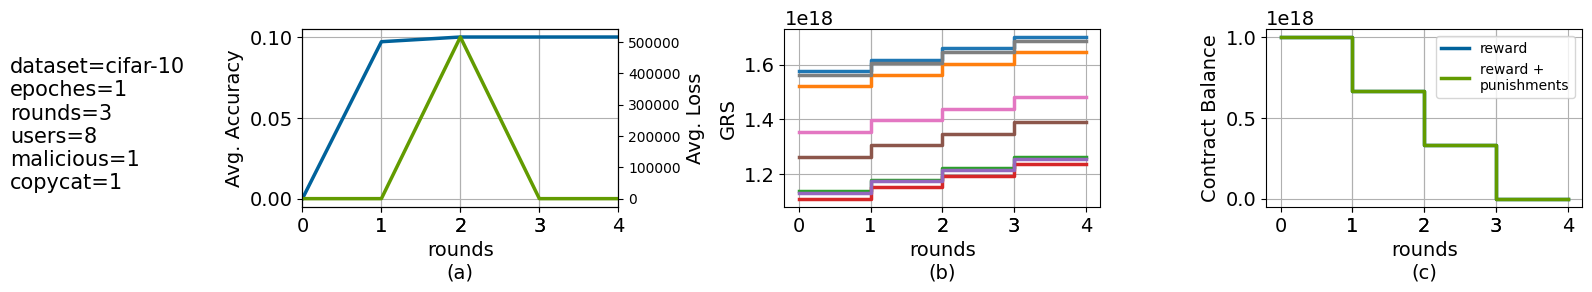

In [9]:
model.visualize_simulation()

### Transactions

In [10]:
print("{:<10} - {:^64} -    Gas Used - {}".format("Function", "Transaction Hash", "Success"))
print("------------------------------------------------------------------------------------------")
for f, txhash in model.txHashes:
    r = model.w3.eth.waitForTransactionReceipt(txhash)
    if r["status"] == 1:
        success = "✅"
    else:
        success = "FAIL"
    
    gas = r["gasUsed"]
    print("{:<10} - {} - {:>9,.0f} -   {}".format(f, txhash, gas, success))

Function   -                         Transaction Hash                         -    Gas Used - Success
------------------------------------------------------------------------------------------
register   - 0x2c189700de4c02f8cd41fb9bef76212b66eead3ec90bbf206c67ce36bb8c2437 -   127,396 -   ✅
register   - 0xbb3e47241c311316ae717ab8c2b0c5cda4b736ed2559f123708d5f79f3b63453 -   127,396 -   ✅
register   - 0x9600611eedaa000d63d85174e0b6a41c3daec2c0a94ad4597a80ecf58402b225 -   127,396 -   ✅
register   - 0xbdf1896f9440364203dbbc0667b1c0dde8b6cd7f0428962b2662d7ffdbd84d43 -   127,396 -   ✅
register   - 0x14e1a8f8470dc18fc0e62b5c6b45e00d355f9d67c6552a3bb136871bbc1456d8 -   127,396 -   ✅
register   - 0x509e0e8009b9dd2df485c444986d1159b88311ac4b13b2ed36adc629ca668d0a -   127,396 -   ✅
register   - 0x11b04d395e56d3b815c75a7525668a2c7c21eff6192c061732f9a5299d35488e -   127,396 -   ✅
slot       - 0xa19f9f10bd2441005efddacd09580037a8025797c58bbbb175a6cc2846b43a7c -    51,185 -   ✅
slot       - 0xfad3e5eb

### Contracts and Paricipants (Latex format)

In [11]:
print("\\renewcommand{\\arraystretch}{1.3}")
print("\\begin{center}")
print("\\begin{tabular}{ c|c }")

print("Contract & Address (Ropsten Testnet) \\\ ")
print("\\hline")
print("Ma-1 & {} \\\ ".format(manager.manager.address))
print("Ch-1 & {} \\\ ".format(model.model.address))
for i, p in enumerate(model.pytorch_model.participants[:-1] + \
                           model.pytorch_model.disqualified + \
                           [model.pytorch_model.participants[-1]]):
    print("P-{}  & {} \\\ ".format(i+1, p.address))

print("\\end{tabular}")
print("\\end{center}")

\renewcommand{\arraystretch}{1.3}
\begin{center}
\begin{tabular}{ c|c }
Contract & Address (Ropsten Testnet) \\ 
\hline
Ma-1 & 0x82f51aA88d7683aa0a044180A2256B16E0cE56c9 \\ 
Ch-1 & 0xeEA8Fd41F9A9D495e8C71C42CC28C9F9e882F89f \\ 
P-1  & 0x09Ca61C7cb86d8DE76E3E637a8e3CfA481Ecef99 \\ 
P-2  & 0xe7F50AB14f0fb1E140bbb7f03655dc9C922F5980 \\ 
P-3  & 0xCe57EAfD18afA405A26BCFa6F2B4fB872A62Dc78 \\ 
P-4  & 0xC0148dFB7E61c11e84225881723A8bEB45c7002A \\ 
P-5  & 0xa46d9Edaac1d2153168Cdf7e525880bC53827109 \\ 
P-6  & 0xE6d028402A486980cf97375BD9A6C0aBDa5d089c \\ 
P-7  & 0x0be222949e94CdFa24e655A3F8dD5E26b49b8D49 \\ 
P-8  & 0xE7470ce9261C9fBAE775874cc0550dbC5fAC3333 \\ 
\end{tabular}
\end{center}


### Table with Gas Info (Latex format)

In [12]:
reg = model.gas_register, "register"
fed = model.gas_feedback, "feedback"
clo = model.gas_close, "settle round"
slo = model.gas_slot, "reserve slot"
wei = model.gas_weights, "provide weights**"
dep = manager.gas_deploy, "deployment"
dep = manager.gas_deploy, "deployment"
ext = model.gas_exit, "exit"

tot  = 0
tot2 = 0

print("\\begin{tabular}{ |c|c|c| }\n\hline\nFunction & Gas Amount & Gas Costs*\\\ \n\hline")
for i, f in [reg,slo,wei,fed,clo]:
    print("{} & {:,.0f} & {:.5f} ETH \\\ ".format(f, sum(i)/len(i), sum(i)/len(i) * 20e9 / 1e18 ))
    tot += sum(i)/len(i)
    if i != clo[0]:
            tot2 += sum(i)/len(i)
        
print("\hline\n\hline")
print("complete round & {:,.0f} & {:.5f} \\\ ".format(tot, tot * 20e9 / 1e18))
print("\hline\n\end{tabular}")

\begin{tabular}{ |c|c|c| }
\hline
Function & Gas Amount & Gas Costs*\\ 
\hline
register & 127,396 & 0.00255 ETH \\ 
reserve slot & 51,184 & 0.00102 ETH \\ 
provide weights** & 60,017 & 0.00120 ETH \\ 
feedback & 367,852 & 0.00736 ETH \\ 
settle round & 754,350 & 0.01509 ETH \\ 
\hline
\hline
complete round & 1,360,800 & 0.02722 \\ 
\hline
\end{tabular}
